# Lab 3: Gesture Recognition using Convolutional Neural Networks

In this lab you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Load and split data for training, validation and testing
2. Train a Convolutional Neural Network
3. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/14RMOUCbob5_6j3uaQuvKHY1oTSvPpVD2?usp=sharing


In [ ]:
%%shell
jupyter nbconvert --to html /content/Fall_2023_Lab3_Gesture_Recognition.ipynb

[NbConvertApp] Converting notebook /content/Fall_2023_Lab3_Gesture_Recognition.ipynb to html
[NbConvertApp] Writing 1241102 bytes to /content/Fall_2023_Lab3_Gesture_Recognition.html


## Dataset

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing. The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
)

In [ ]:
import torch
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.datasets import ImageFolder

import os
import shutil
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
use_cuda = True

I split the code into 60% training, 20% validation, and 20% testing. The code below moves images from the full set of data into a new folder (training, validation, or testing). Once an image is moved, it will be removed from the source folder, thus ensuring that images do not appear twice/cross over datasets (i.e., an image in the training set will not appear in the validation set or the test set).

In [ ]:
## We want to take 60% of each subfolder (class) in the original dataset and copy those to a new folder (training) with the same subfolders (classes) as the original folder:

source_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Gestures_Summer'
train_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Train'

subfolders = os.listdir(source_folder)

# Making the class subfolders in the training folder, and then moving 60% of the images within each class to their respective folders:
for letter in subfolders:
  os.makedirs(train_folder + '/' + letter, exist_ok = True)
  files = os.listdir(source_folder + '/' + letter)
  print(files)

  for image in files:
    source_path = source_folder + '/' + letter + '/' + image
    destination_path = train_folder + '/' + letter + '/' + image
    shutil.move(source_path, destination_path)

    if len(os.listdir(train_folder + '/' + letter)) >= 0.6*len(files): #This is the part that ensures 60% for training
      break

# After running this code, 60% of each class folder is now in each training subfolder. Since we used shutil.move, the original source folder now contains only 40% of its original contents.

['1377_A_1.jpg', '1055_A_3.jpg', '1514_A_3.jpg', '1998_A_1.jpg', '621_A_1.jpg', '2188_A_2.jpg', '379_A_2.jpg', '1216_A_2.jpg', '2295_A_1.jpg', '486_A_1.jpg', '568_A_2.jpg', '297_A_1.jpg', '1027_A_2.jpg', '595_A_2.jpg', '1540_A_2.jpg', '1242_A_1.jpg', '1757_A_3.jpg', '1566_A_1.jpg', '1001_A_3.jpg', '2107_A_2.jpg', '1323_A_1.jpg', '2268_A_1.jpg', '1703_A_3.jpg', '513_A_1.jpg', '218_A_3.jpg', '1892_A_3.jpg', '1134_A_1.jpg', '919_A_2.jpg', '324_A_1.jpg', '704_A_3.jpg', '1431_A_1.jpg', '675_A_1.jpg', '972_A_1.jpg', '1351_A_2.jpg', '378_A_1.jpg', '1784_A_3.jpg', '1026_A_1.jpg', '1161_A_1.jpg', '244_A_2.jpg', '1000_A_2.jpg', '1350_A_1.jpg', '1243_A_2.jpg', '569_A_3.jpg', '2457_A_1.jpg', '56_A_3.jpg', '1999_A_2.jpg', '1298_A_3.jpg', '594_A_1.jpg', '2269_A_2.jpg', '812_A_3.jpg', '758_A_3.jpg', '2270_A_3.jpg', '1593_A_1.jpg', '1135_A_2.jpg', '1406_A_3.jpg', '245_A_3.jpg', '487_A_2.jpg', '1541_A_3.jpg', '1702_A_2.jpg', '650_A_3.jpg', '1891_A_2.jpg', '461_A_3.jpg', '2189_A_3.jpg', '270_A_1.jpg', '

In [ ]:
# Here we can check that only 40% of the original contents of the A subfolder remain in the source folder... A originally contained 254 files.

files = os.listdir(source_folder + '/A')
print(len(files))

101


In [ ]:
source_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Gestures_Summer'
subfolders = os.listdir(source_folder)
val_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Val'

# Making the class subfolders in the validation folder, and then moving 20% of the images (or 50% of the remaining images in the source folder) within each class to their respective folders:
for letter in subfolders:
  os.makedirs(val_folder + '/' + letter, exist_ok = True)
  files = os.listdir(source_folder + '/' + letter)
  print(files)

  for image in files:
    source_path = source_folder + '/' + letter + '/' + image
    destination_path = val_folder + '/' + letter + '/' + image
    shutil.move(source_path, destination_path)

    if len(os.listdir(val_folder + '/' + letter)) >= 0.5*len(files): #This is the part that ensures 50% of remaining source images
      break

['1944_A_1.jpg', '785_A_3.jpg', '757_A_2.jpg', '515_A_3.jpg', '83_A_3.jpg', '217_A_2.jpg', '1325_A_3.jpg', '1973_A_3.jpg', '2187_A_1.jpg', '999_A_1.jpg', '1620_A_1.jpg', '243_A_1.jpg', '1081_A_2.jpg', '702_A_1.jpg', '1594_A_2.jpg', '1512_A_1.jpg', '1674_A_1.jpg', '756_A_1.jpg', '1296_A_1.jpg', '135_A_1.jpg', '784_A_2.jpg', '974_A_3.jpg', '2079_A_1.jpg', '1378_A_2.jpg', '1728_A_1.jpg', '1676_A_3.jpg', '163_A_2.jpg', '406_A_2.jpg', '1649_A_3.jpg', '1244_A_3.jpg', '1487_A_3.jpg', '2322_A_1.jpg', '893_A_3.jpg', '352_A_2.jpg', '2215_A_2.jpg', '2000_A_3.jpg', '459_A_1.jpg', '1053_A_1.jpg', '1783_A_2.jpg', '541_A_2.jpg', '108_A_1.jpg', '891_A_1.jpg', '28_A_2.jpg', '567_A_1.jpg', '920_A_3.jpg', '1028_A_3.jpg', '2241_A_1.jpg', '298_A_2.jpg', '1945_A_2.jpg', '1622_A_3.jpg', '838_A_2.jpg', '2135_A_3.jpg', '1836_A_1.jpg', '380_A_3.jpg', '1809_A_1.jpg', '1269_A_1.jpg', '1485_A_1.jpg', '137_A_3.jpg', '2349_A_1.jpg', '2350_A_2.jpg', '2054_A_3.jpg', '1270_A_2.jpg', '865_A_2.jpg', '1189_A_2.jpg', '432_

In [ ]:
# Here we can check that only 20% of the original contents of the A subfolder remain in the source folder... A originally contained 254 files.

files = os.listdir(source_folder + '/A')
print(len(files))

50


In [ ]:
subfolders = os.listdir(source_folder)
source_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Gestures_Summer'
test_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Test'

# Making the class subfolders in the testing folder, and then moving 20% of the images (or all of the remaining images in the source folder) within each class to their respective folders:
for letter in subfolders:
  os.makedirs(test_folder + '/' + letter, exist_ok = True)
  files = os.listdir(source_folder + '/' + letter)
  print(files)

  for image in files:
    source_path = source_folder + '/' + letter + '/' + image
    destination_path = test_folder + '/' + letter + '/' + image
    shutil.move(source_path, destination_path)

['2135_A_3.jpg', '1836_A_1.jpg', '380_A_3.jpg', '1809_A_1.jpg', '1269_A_1.jpg', '1485_A_1.jpg', '137_A_3.jpg', '2349_A_1.jpg', '2350_A_2.jpg', '2054_A_3.jpg', '1270_A_2.jpg', '865_A_2.jpg', '1189_A_2.jpg', '432_A_1.jpg', '2243_A_3.jpg', '81_A_1.jpg', '1810_A_2.jpg', '1190_A_3.jpg', '1971_A_1.jpg', '2026_A_2.jpg', '542_A_3.jpg', '1107_A_1.jpg', '1811_A_3.jpg', '162_A_1.jpg', '136_A_2.jpg', '1730_A_3.jpg', '1729_A_2.jpg', '2242_A_2.jpg', '2351_A_3.jpg', '353_A_3.jpg', '2134_A_2.jpg', '2027_A_3.jpg', '1460_A_3.jpg', '2216_A_3.jpg', '1271_A_3.jpg', '1863_A_1.jpg', '1082_A_3.jpg', '1946_A_3.jpg', '1188_A_1.jpg', '110_A_3.jpg', '2323_A_2.jpg', '405_A_1.jpg', '433_A_2.jpg', '839_A_3.jpg', '109_A_2.jpg', '1648_A_2.jpg', '29_A_3.jpg', '1837_A_2.jpg', '864_A_1.jpg', '2160_A_1.jpg']
['848_D_3.jpg', '171_D_1.jpg', '2306_D_3.jpg', '1793_D_3.jpg', '551_D_3.jpg', '1955_D_3.jpg', '416_D_3.jpg', '1226_D_3.jpg', '442_D_2.jpg', '712_D_2.jpg', '1629_D_1.jpg', '281_D_3.jpg', '253_D_2.jpg', '1360_D_2.jpg', 

In [ ]:
# Here we can check that 0% of the original contents of the A subfolder remain in the source folder... A originally contained 254 files.

files = os.listdir(source_folder + '/A')
print(len(files))

0


##------------------------------------------------------------------------------
We have successfully moved all the images into their respective folders; 60% train, 20% validation, 20% testing. When running the code, run from here down since the folders (train, val, test) have already been made.

In [1]:
## Defining Folder Paths

train_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Train'
val_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Val'
test_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Test'

transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])

train_set = torchvision.datasets.ImageFolder(train_folder, transform = transform)
val_set = torchvision.datasets.ImageFolder(val_folder, transform = transform)
test_set = torchvision.datasets.ImageFolder(test_folder, transform = transform)

overfit_folder = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Overfit'
overfit_set = torchvision.datasets.ImageFolder(overfit_folder, transform = transform)

KeyboardInterrupt: ignored

In [ ]:
## Helper Functions
def get_model_name(name, batch_size, lr, num_epochs):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_num_epoch{3}".format(name,
                                                   batch_size,
                                                   lr,
                                                   num_epochs)
    return path

### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

I chose to have three convolutional layers followed by two fully connected layers. I chose to have three convolutional layers to ensure that the model is able to extract necessary high level features which it can then map to the various classes through the application of the two fully connected layers. Each convolutional layer has substantially higher out channels than in channels; this is to ensure we have a deep model that can learn high level features of the gestures. The kernel sizes I chose were 5x5 for Conv1, and 3x3 for Conv2/Conv3. I added padding of two pixels around the image borders, as I wanted to ensure the model sees the edge pixels more than once. Aside from the convolutional/fully conencted layers, I added pooling layers after each convolutional layer so as to reduce the spacial dimensions as we go deeper in the model. For activation function, I used ReLu

In [ ]:
#Convolutional Neural Network Architecture

torch.manual_seed(10) # set the random seed
from math import floor

final_depth = 25

class CNN_Gestures(nn.Module):
    def __init__(self, kernel_sizes = [5,3,3], final_depth = final_depth, stride = 1, padding = 2, name = "CNN"):
        super(CNN_Gestures, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_sizes[0],1,2) #in_channels (3 input chanels bc RGB), out_channels, kernel_size
        self.conv2 = nn.Conv2d(10, 20, kernel_sizes[1],1,2)
        self.conv3 = nn.Conv2d(20, final_depth, kernel_sizes[2],1,2)

        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride

        # How long is the input vector into the fully connected layer? Note that we divide by 2 because our pooling layers reduce the spacial dimensions by half
        self.layer1 = floor(((224 + 2*padding - kernel_sizes[0])/stride + 1)/2)
        self.layer2 = floor(((self.layer1 + 2*padding - kernel_sizes[1])/stride + 1)/2)
        self.layer3 = floor(((self.layer2 + 2*padding - kernel_sizes[2])/stride + 1)/2)
        self.fullyconnected = int(final_depth*self.layer3*self.layer3) # final depth after 3rd convolutional layer * H_layer3 * W_layer3

        self.fc1 = nn.Linear(self.fullyconnected, 32)
        self.fc2 = nn.Linear(32, 9)

        self.name = name

    def forward(self, image):
        image = self.pool(F.relu(self.conv1(image)))
        image = self.pool(F.relu(self.conv2(image)))
        image = self.pool(F.relu(self.conv3(image)))

        image = image.view(-1, self.fullyconnected)

        image = F.relu(self.fc1(image))
        image = self.fc2(image)
        return image

### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

I chose the loss function of nn.CrossEntropyLoss() as this is a multi classification problem, and nn.CrossEntropyLoss() is more numerically stable than nn.NLLLoss. The former also applies softmax internally, so we don't have to apply it ourselves to the final fully connected layer. I chose the ADAM optimizer since it works well for multi-class classification.

In [ ]:
# Default parameters are batch size of 64, 32 epochs, learning rate of 0.001

def train(model, train_set, val_set, batch_size=64, num_epochs=32, lr=0.001):
    torch.manual_seed(10)
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        model_path = get_model_name(model.name, batch_size, lr, epoch)
        torch.save(model.state_dict(), model_path)

        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        n += 1

    epochs = np.arange(1, num_epochs + 1)

    return train_acc, val_acc, epochs

In [ ]:
def get_accuracy(model, data_loader):

    correct = 0
    total = 0
    for imgs, labels in data_loader:

        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

I made the Overfit dataset by copying 10 random images from the training set of each class and pasting them into a new folder to be used for this overfitting sanity check.

I am using a batch size of 90 as the complete data set has 90 images (10 per class). I chose a standard learning rate of 0.001 and 100 epochs. Since the batch size is 90 and the data set contains 90 images, having 100 epochs means having 100 iterations.

In [ ]:
def overfit(model, overfit_loader, batch_size=90, num_epochs=100, lr = 0.001):

    torch.manual_seed(10)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)

    overfit_acc = []

    # training
    print ("Training Started...")
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(overfit_loader):

            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
        n += 1

        # track accuracy
        overfit_acc.append(get_accuracy(model, overfit_loader))
        print("Epoch: {0}, Accuracy: {1}".format(epoch, overfit_acc[-1]))
    print("Number of iteration", n)
    return overfit_acc

In [ ]:
CNN = CNN_Gestures()
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

overfit_loader = torch.utils.data.DataLoader(overfit_set, batch_size=90, shuffle = True)

overfit(CNN, overfit_loader)

Training Started...
Epoch: 0, Accuracy: 0.13333333333333333
Epoch: 1, Accuracy: 0.1111111111111111
Epoch: 2, Accuracy: 0.1111111111111111
Epoch: 3, Accuracy: 0.12222222222222222
Epoch: 4, Accuracy: 0.17777777777777778
Epoch: 5, Accuracy: 0.2111111111111111
Epoch: 6, Accuracy: 0.3
Epoch: 7, Accuracy: 0.25555555555555554
Epoch: 8, Accuracy: 0.2222222222222222
Epoch: 9, Accuracy: 0.3
Epoch: 10, Accuracy: 0.3111111111111111
Epoch: 11, Accuracy: 0.37777777777777777
Epoch: 12, Accuracy: 0.3333333333333333
Epoch: 13, Accuracy: 0.36666666666666664
Epoch: 14, Accuracy: 0.36666666666666664
Epoch: 15, Accuracy: 0.34444444444444444
Epoch: 16, Accuracy: 0.4222222222222222
Epoch: 17, Accuracy: 0.4222222222222222
Epoch: 18, Accuracy: 0.37777777777777777
Epoch: 19, Accuracy: 0.4777777777777778
Epoch: 20, Accuracy: 0.4888888888888889
Epoch: 21, Accuracy: 0.4666666666666667
Epoch: 22, Accuracy: 0.5777777777777777
Epoch: 23, Accuracy: 0.5777777777777777
Epoch: 24, Accuracy: 0.5777777777777777
Epoch: 25, 

[0.13333333333333333,
 0.1111111111111111,
 0.1111111111111111,
 0.12222222222222222,
 0.17777777777777778,
 0.2111111111111111,
 0.3,
 0.25555555555555554,
 0.2222222222222222,
 0.3,
 0.3111111111111111,
 0.37777777777777777,
 0.3333333333333333,
 0.36666666666666664,
 0.36666666666666664,
 0.34444444444444444,
 0.4222222222222222,
 0.4222222222222222,
 0.37777777777777777,
 0.4777777777777778,
 0.4888888888888889,
 0.4666666666666667,
 0.5777777777777777,
 0.5777777777777777,
 0.5777777777777777,
 0.7,
 0.6666666666666666,
 0.6555555555555556,
 0.7444444444444445,
 0.7111111111111111,
 0.6888888888888889,
 0.6888888888888889,
 0.8333333333333334,
 0.7666666666666667,
 0.9,
 0.7888888888888889,
 0.9111111111111111,
 0.8777777777777778,
 0.8888888888888888,
 0.9333333333333333,
 0.9,
 0.9444444444444444,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9888888888888

Evidently, the model was able to overfit; after 56 epochs, the training accuracy reached 100%, showing that the model had memorized the data.

### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

**I will be tuning the batch size, number of epochs, and final depth (i.e., size of tensor going into the FC layer).**

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

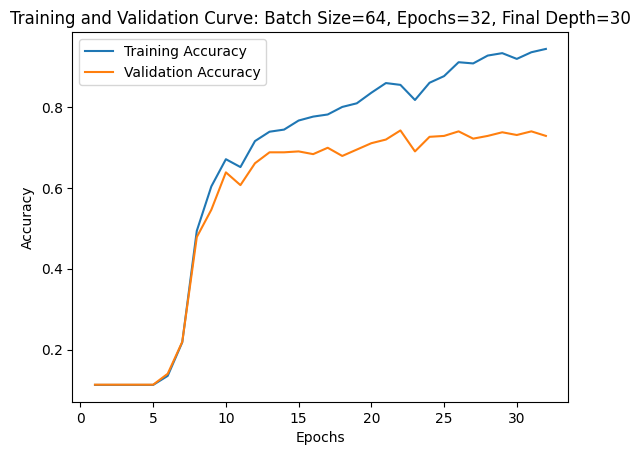

In [ ]:
## First will try default of batch size = 64, epochs = 32, final depth = 30

CNN = CNN_Gestures()
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

train_acc, val_acc, epochs = train(CNN, train_set, val_set, batch_size = 64, num_epochs = 32)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Training and Validation Curve: Batch Size=64, Epochs=32, Final Depth=30")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


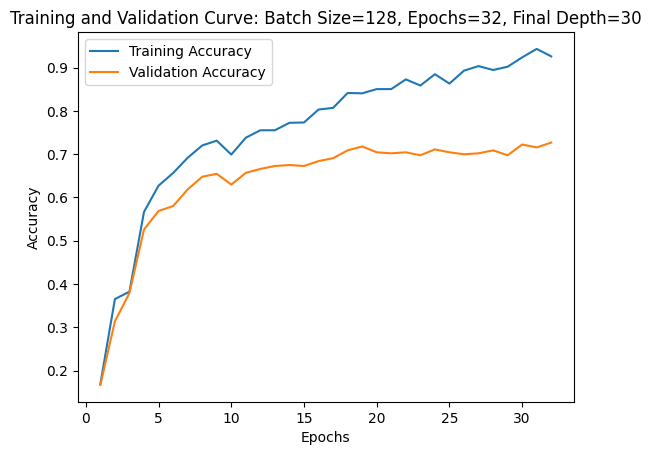

In [ ]:
## Next, will try batch size = 128, epochs = 32, final depth = 30

CNN = CNN_Gestures()
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

train_acc, val_acc, epochs = train(CNN, train_set, val_set, batch_size = 128, num_epochs = 32)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Training and Validation Curve: Batch Size=128, Epochs=32, Final Depth=30")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Increasing batch size did not seem to have much impact on the training/validation accuracies. Given that batch size of 128 is less resource intensive (i.e., fewers iterations), I will keep batch size of 128 for now.

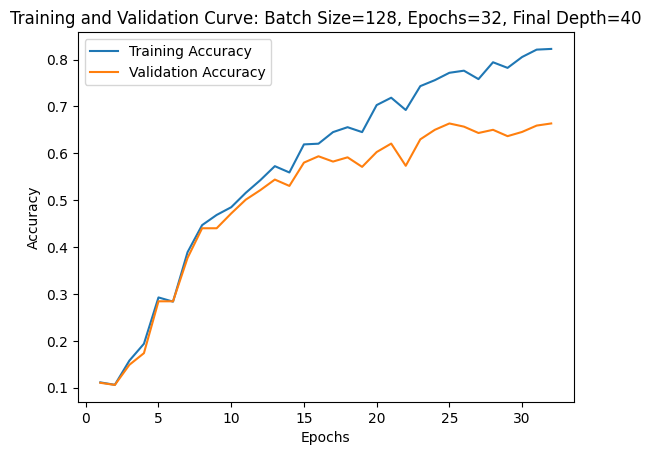

In [ ]:
## Next, will try batch size = 128, epochs = 32, final depth = 40

CNN = CNN_Gestures()
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

train_acc, val_acc, epochs = train(CNN, train_set, val_set, batch_size = 128, num_epochs = 32)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Training and Validation Curve: Batch Size=128, Epochs=32, Final Depth=40")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Increasing the final depth seemed to decrease both accuracies by about 10%. Next will try decreasing the final depth.

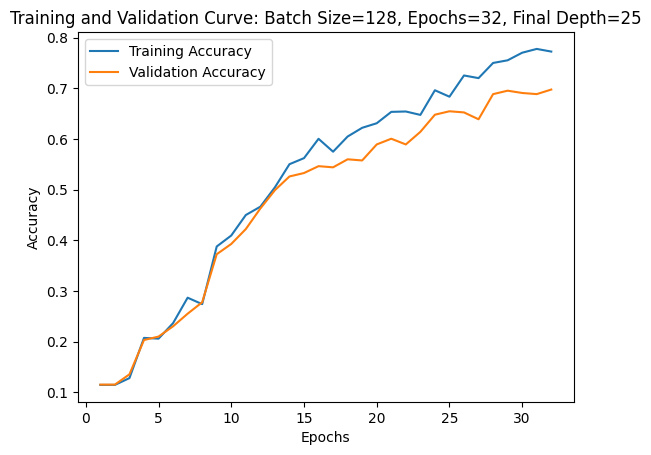

In [ ]:
## Next, will try batch size = 128, epochs = 32, final depth = 25

CNN = CNN_Gestures(name = 'CNN_4')
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

train_acc, val_acc, epochs = train(CNN, train_set, val_set, batch_size = 128, num_epochs = 32)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Training and Validation Curve: Batch Size=128, Epochs=32, Final Depth=25")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Lowering the final depth to 25 also did not seem to change much. I will now try going back to final depth of 40 but then increasing epochs to 64. I'll try this as the training/validation curves for final depth = 40 did not seem to be plateauing yet.

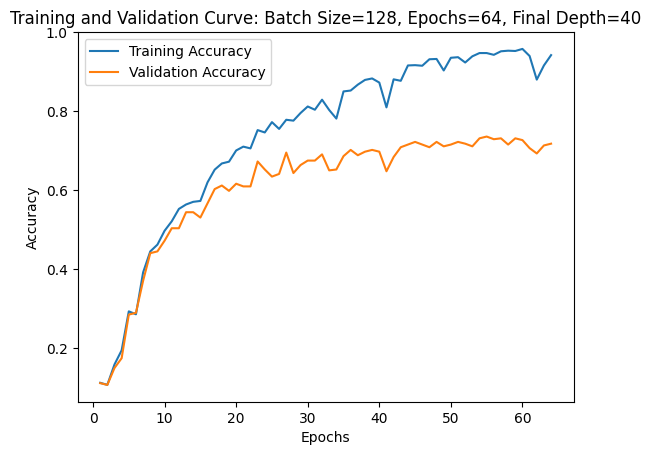

In [ ]:
## Next, will try batch size = 128, epochs = 64, final depth = 40

CNN = CNN_Gestures()
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

train_acc, val_acc, epochs = train(CNN, train_set, val_set, batch_size = 128, num_epochs = 64)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Training and Validation Curve: Batch Size=128, Epochs=64, Final Depth=40")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Batch size of 128, epochs of 64, and final depth of 40 seem to result in validation accuracy plateau of around 65%. I will now try changing batch size a few times, but this time using final depth of 25 (as that one seemed to give slightly better results than 30/40).

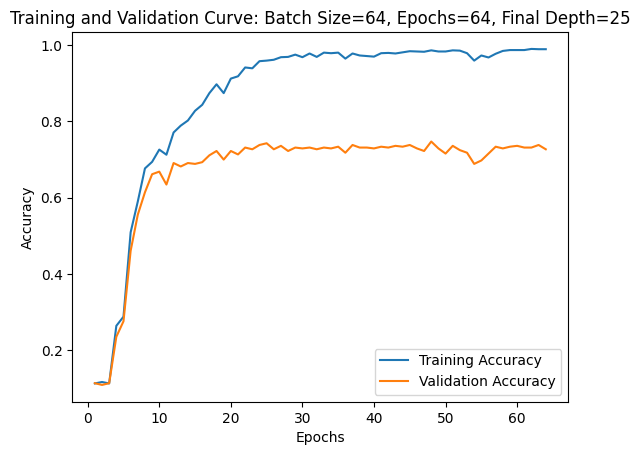

In [ ]:
## Next, will try batch size = 64, epochs = 64, final depth = 25

CNN = CNN_Gestures()
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

train_acc, val_acc, epochs = train(CNN, train_set, val_set, batch_size = 64, num_epochs = 64)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Training and Validation Curve: Batch Size=64, Epochs=64, Final Depth=25")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

With the lower batch size, it seems that the model is overfitting a bit, as the training accuracy plateaus around 100%. Next we will try a larger batch size.

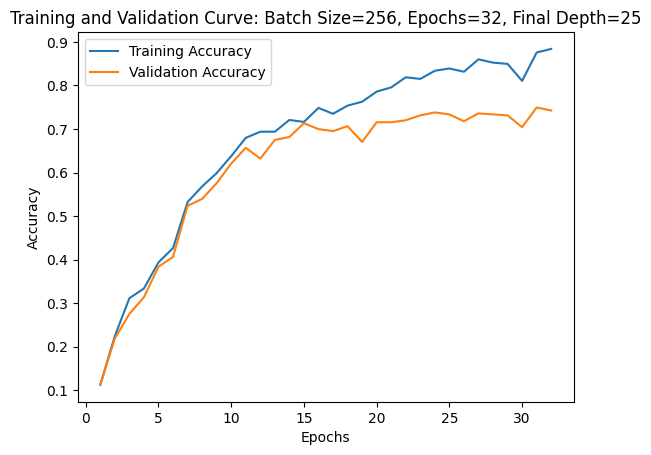

In [ ]:
## Next, will try batch size = 256, epochs = 32, final depth = 25

CNN = CNN_Gestures(name = 'CNN_7')
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

train_acc, val_acc, epochs = train(CNN, train_set, val_set, batch_size = 256, num_epochs = 32)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Training and Validation Curve: Batch Size=256, Epochs=32, Final Depth=25")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

Out of the models I trained above, it appears that the best set of parameters are batch size of 256, 32 epochs, and a final depth of 25%. This combination resulted in the highest validation accuracy (~72% at 30 epochs) while not showing signs of overfitting.

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=True)

CNN = CNN_Gestures(final_depth = 25, name = 'CNN_7')
if use_cuda and torch.cuda.is_available():
  CNN.cuda()

model_path = get_model_name(CNN.name, batch_size=256, lr=0.001, num_epochs=30)
for_test = torch.load(model_path)
CNN.load_state_dict(for_test)

<All keys matched successfully>

In [ ]:
get_accuracy(CNN, test_loader)

0.7204545454545455

### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 176MB/s]


The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
features = alexnet.features(img)

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:
## Import modules...
import os
import torchvision.models

# Prepare Dataloader
batch_size = 1 # save 1 file at a time

train_data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                            shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,
                                            shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                            shuffle=True)

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [ ]:
# We want to extract the features of each image in the training set and then save those to a new folder: Lab3_Train_Features
n = 0
for img, label in train_data_loader:
  features = alexnet.features(img) #extract the features for each image
  features_tensor = torch.from_numpy(features.detach().numpy()) #create a PyTorch tensor for the extracted features

  folder_name = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Train_Features/' + str(classes[label]) #folder for training features
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

#saving the feature tensor to the training folder and adding unique identifier/counter
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.imagefeaturetensor')
  n += 1

In [ ]:
# We want to extract the features of each image in the validation set and then save those to a new folder: Lab3_Val_Features
n = 0
for img, label in val_data_loader:
  features = alexnet.features(img) #extract the features for each image
  features_tensor = torch.from_numpy(features.detach().numpy()) #create a PyTorch tensor for the extracted features

  folder_name = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Val_Features/' + str(classes[label]) #folder for validation features
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

#saving the feature tensor to the validation folder and adding unique identifier/counter
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.imagefeaturetensor')
  n += 1

In [ ]:
# We want to extract the features of each image in the testing set and then save those to a new folder: Lab3_Test_Features
n = 0
for img, label in test_data_loader:
  features = alexnet.features(img) #extract the features for each image
  features_tensor = torch.from_numpy(features.detach().numpy()) #create a PyTorch tensor for the extracted features

  folder_name = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Test_Features/' + str(classes[label]) #folder for testing features
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

#saving the feature tensor to the testing folder and adding unique identifier/counter
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.imagefeaturetensor')
  n += 1

### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
# Here we make datasets for training/validation/testing by loading data from the specified directories

train_features = torchvision.datasets.DatasetFolder('/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Train_Features', loader=torch.load, extensions=('.imagefeaturetensor'))
val_features = torchvision.datasets.DatasetFolder('/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Val_Features', loader=torch.load, extensions=('.imagefeaturetensor'))
test_features = torchvision.datasets.DatasetFolder('/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Test_Features', loader=torch.load, extensions=('.imagefeaturetensor'))


In [ ]:
# Defining the transfer learning model

torch.manual_seed(10) # set the random seed
from math import floor

class AlexNetModel(nn.Module):
    def __init__(self, kernel_sizes = [3], final_depth = 512, stride = 1, padding = 2, name = "AlexNetModel"):
        super(AlexNetModel, self).__init__()
        self.conv1 = nn.Conv2d(256, final_depth, kernel_sizes[0],1,2) #in_channels (3 input chanels bc RGB), out_channels, kernel_size

        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride

        # How long is the input vector into the fully connected layer? Note that we divide by 2 because our pooling layers reduce the spacial dimensions by half
        self.layer1 = floor(((6 + 2*padding - kernel_sizes[0])/stride + 1)/2)
        self.fullyconnected = int(final_depth*self.layer1*self.layer1) # final depth after 3rd convolutional layer * H_layer3 * W_layer3

        self.fc1 = nn.Linear(self.fullyconnected, 32)
        self.fc2 = nn.Linear(32, 9)

        self.name = name

    def forward(self, features):
        features = self.pool(F.relu(self.conv1(features)))
        features = features.view(-1, self.fullyconnected)
        features = F.relu(self.fc1(features))
        features = self.fc2(features)

        return F.softmax(features, dim=1)

### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

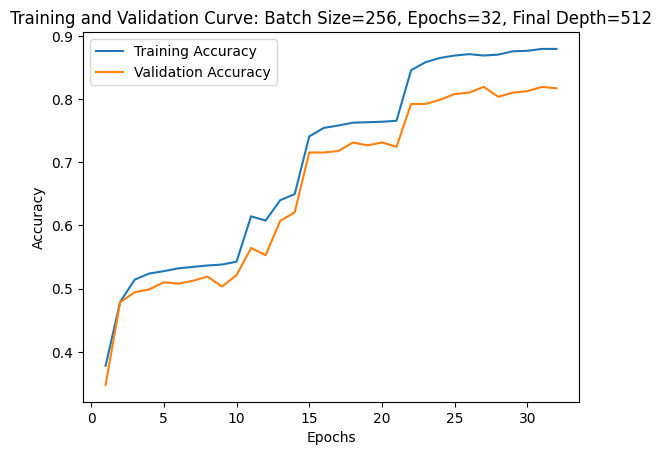

In [ ]:
# Training the AlexNetModel

model = AlexNetModel()
if use_cuda and torch.cuda.is_available():
  model.cuda()

train_acc, val_acc, epochs = train(model, train_features, val_features, batch_size = 256, num_epochs = 32, lr = 0.001)

plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.title("Training and Validation Curve: Batch Size=256, Epochs=32, Final Depth=512")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [ ]:
test_loader = torch.utils.data.DataLoader(test_features, batch_size=256, shuffle=True)

ANM = AlexNetModel()
if use_cuda and torch.cuda.is_available():
  ANM.cuda()

model_path = get_model_name(ANM.name, batch_size=256, lr=0.001, num_epochs=27)
for_test = torch.load(model_path)
ANM.load_state_dict(for_test)

<All keys matched successfully>

In [ ]:
get_accuracy(ANM, test_loader)

0.8045454545454546

The model pre-trained on AlexNet performed substantially better than the original CNN which did not use transfer learning. The test accuracy of the original model was ~72%, whereas the AlexNetModel obtained a test accuracy of ~80%. This improvement is due to the fact that AlexNet learned high level features about images on a very large dataset, and then we used those learned to apply those high level features to the classification of hand gestures.

### 5. Additional Testing [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures.

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

In [ ]:
# We want to extract the features of each image in the overfit set from Part 2c) and then save those to a new folder: Lab3_Overfit_Features

## Import modules...
import os
import torchvision.models

# Prepare Overfit Dataloader
batch_size = 1 # save 1 file at a time

overfit_data_loader = torch.utils.data.DataLoader(overfit_set, batch_size=batch_size,
                                            shuffle=True)

n = 0
for img, label in overfit_data_loader:
  features = alexnet.features(img) #extract the features for each image
  features_tensor = torch.from_numpy(features.detach().numpy()) #create a PyTorch tensor for the extracted features

  folder_name = '/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Overfit_Features/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

#saving the feature tensor to the training folder and adding unique identifier/counter
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.imagefeaturetensor')
  n += 1

In [ ]:
# This question asks us to use the small overfitting dataset which was made in 2c) to test the AlexNet model:

overfit_features = torchvision.datasets.DatasetFolder('/content/drive/MyDrive/APS360_Fall/Lab_3/Lab3_Overfit_Features', loader=torch.load, extensions=('.imagefeaturetensor'))

In [ ]:
overfit_loader = torch.utils.data.DataLoader(overfit_features, batch_size=256, shuffle=True)

ANM = AlexNetModel()
if use_cuda and torch.cuda.is_available():
  ANM.cuda()

model_path = get_model_name(ANM.name, batch_size=256, lr=0.001, num_epochs=27)
for_test = torch.load(model_path)
ANM.load_state_dict(for_test)

<All keys matched successfully>

In [ ]:
get_accuracy(ANM, overfit_loader)

0.8666666666666667

When checking the test accuracy on the small overfit dataset, it seems that the model performed slightly better than when we tested on the original test dataset. I believe this is due to the fact that the overfit image set is comprised of images that randomly sampled from the source folder. As such, it is possible that some of the images in the overfit set were already in the testing/validation set, meaning that the increase in accuracy may be due to the model seeing images that it had already seen in training/validation during testing.